In [1]:
#Instalamos la librería que vamos a necesitar para abrir el archivo dta
!pip install pyreadstat
%pip install pyod
%pip install openpyxl
# Primero importamos las librerías necesarias para leer y manipular la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pyreadstat as prs



Note: you may need to restart the kernel to use updated packages.


In [2]:
# Abrimos la carpeta donde se encuentran las bases de datos
#os.chdir(r"C:/Users\s1248850/OneDrive - Syngenta/Documents/Rosario Luque/Ciencias de datos/TP/TP3")
os.chdir(r"c:\Users\s1290226\OneDrive - Syngenta\Desktop\UdeSA\Ciencia de datos\CC408-T2-3\TP3")
# Guardamos las bases de datos en en dos variables
ind_2004, meta = prs.read_dta("Individual_t104.dta")

ind_2024 = pd.read_excel("usu_individual_T124.xlsx")

Para poder trabajar con ambas bases de datos es necesario primero pasar el nombre de todas las columnas a minúscula. Esto nos permitirá luego concatenar las bases de datos en una sola y preservar la estructura de la información.

In [3]:
# En la base de datos del 2024 los nombres de las columnas están en mayúsculas.
# Entonces, cambiamos los nombres de las columnas a minúsculas.
ind_2024.columns = ind_2024.columns.str.lower()
#ind_2024.head()

#Just in case, hacemos lo mismo para la base del 2004.
ind_2004.columns = ind_2004.columns.str.lower()
ind_2004.head()

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


a. Eliminen todas las observaciones que no corresponden a los
aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos
Aires, y unan ambos trimestres en una sola base.

In [4]:
# Contar el número de filas en el dataframe ind_2004 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33 = ind_2004[ind_2004['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2004 es: {count_32_33}")
# Contar el número de filas en el dataframe ind_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33 = ind_2024[ind_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2024 es: {count_32_33}")

El número de filas con aglomerado 32 y 33 para el año 2004 es: 7647
El número de filas con aglomerado 32 y 33 para el año 2024 es: 7051


In [5]:
# Primero filtramos los aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
#aglomerados_deseados = ['Ciudad Autónoma de Buenos Aires', 'Gran Buenos Aires']
ind_2004 = ind_2004[ind_2004['aglomerado'].isin([32, 33])]
ind_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])]


# Luego unimos ambos trimestres en una sola bases de datos
unificado = pd.concat([ind_2004, ind_2024], ignore_index=True)
# Y eliminamos las columnas que se encuentran solo en la base de datos del 2004.
unificado = unificado.drop(columns=["ch05","imputa","pondiio","pondii","pondih"])
print("Número de filas en df_unificado es: ", unificado.shape[0])

Número de filas en df_unificado es:  14698


In [6]:
# Guardar el DataFrame df_unificado en un archivo Excel
unificado.to_excel("df_unificado.xlsx", index=False)
print("El archivo se ha guardado en el directorio actual.")

El archivo se ha guardado en el directorio actual.


b. Si hay observaciones con valores que no tienen sentido,
descártenlas (por ejemplo, ingresos y edades negativos). Expliquen
las decisiones tomadas.

In [7]:
# Dado que la estadística descriptiva y la predicción se va a realizar solo con las variables de CH04, CH06, CH07, CH08, NIVEL ED,
# ESTADO, CAT_INAC, IPCF, nos quedamos solo con esas variables.
df_unificado = unificado[['ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
df_unificado.head()

,ano4,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf
0,2004.0,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0
1,2004.0,2.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0
2,2004.0,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0
3,2004.0,1.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5
4,2004.0,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5


In [8]:
# Primero, vamos a ver si hay valores negativos en las variables ch06 e ipcf.
print("Cantidad de valores negativos en ch06: ", df_unificado[df_unificado['ch06'] < 0].shape[0])
print("Cantidad de valores negativos en ipcf: ", df_unificado[df_unificado['ipcf'] < 0].shape[0])

#Eliminamos los valores negativos de las variables ch06 e ipcf.
df_unificado = df_unificado[df_unificado['ch06'] >= 0]
print("Número de filas en df_unificado luego de eliminar los valores negativos de edad es: ", df_unificado.shape[0])

Cantidad de valores negativos en ch06:  182
Cantidad de valores negativos en ipcf:  0
Número de filas en df_unificado luego de eliminar los valores negativos de edad es:  14516


In [9]:
# Luego de eliminar los valores negativos de la variable de edad, queremos saber cuantos NAs hay en cada variable.
# Contar el número de NAs por fila en el dataframe df_unificado
print("Número de NAs en cada variable:", df_unificado.isna().sum())
#Como no hay NAs en ninguna de las variables, no es necesario hacer nada más.

Número de NAs en cada variable: ano4        0
ch04        0
ch06        0
ch07        0
ch08        0
nivel_ed    0
estado      0
cat_inac    0
ipcf        0
dtype: int64


c. Una vez hecha esa limpieza, realicen un gráfico de barras
mostrando la composición por sexo para 2004 y 2024. Comenten
los resultados.

Valores en ch04 para 2004: ch04
1.0    3528
2.0    3988
Name: count, dtype: int64
Valores en ch04 para 2024: ch04
1.0    3349
2.0    3651
Name: count, dtype: int64


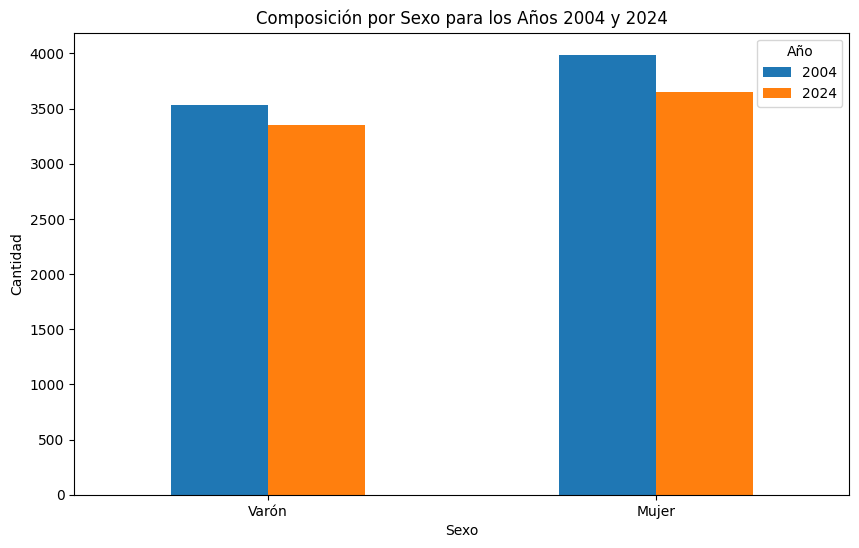

In [10]:
# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Contar la cantidad de hombres y mujeres para cada año
sexo_2004 = df_2004['ch04'].value_counts().sort_index()
sexo_2024 = df_2024['ch04'].value_counts().sort_index()

# Verificar los valores en CH04
print("Valores en ch04 para 2004:", sexo_2004)
print("Valores en ch04 para 2024:", sexo_2024)

# Crear un DataFrame con los conteos
sexo_df = pd.DataFrame({
    '2004': sexo_2004,
    '2024': sexo_2024
}, index=[1, 2])

# Renombrar los índices para que sean 'Varón' y 'Mujer'
sexo_df.index = ['Varón', 'Mujer']

# Crear el gráfico de barras
sexo_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por Sexo para los Años 2004 y 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

d. Realicen una matriz de correlación para 2004 y 2024 con las
siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED,
ESTADO, CAT_INAC, IPCF.

In [11]:
# Antes de realizar las matrices, vamos a renombrar las variables cuyos nombres no son tan obvios.
df_unificado = df_unificado.rename(columns={
    "ch04": "sexo",
    "ch06": "edad",
    "ch07": "estado_civil",
    "ch08": "cobertura_medica",})
df_unificado.head()

,ano4,sexo,edad,estado_civil,cobertura_medica,nivel_ed,estado,cat_inac,ipcf
0,2004.0,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0
1,2004.0,2.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0
2,2004.0,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0
3,2004.0,1.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5
4,2004.0,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5


Antes de realizar la matriz, vamos a reestructurar las variables de interés de forma tal que todas las que son categóricas se conviertan en dummys

In [12]:
# Primero, vamos a hacer que la variable sexo valga 0 si es hombre y 1 si es mujer.
df_unificado['sexo'] = df_unificado['sexo'].replace({1: 0, 2: 1})
# Luego, vamos a crear una nueva variable llamada "estado civil_2" que valga 0 si es unido o casado y 1 si no (3, 4 y 5).
df_unificado['estado_civil_2'] = df_unificado['estado_civil'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})
# Ahora vamos a crear una nueva variable llamada "cobertura_medica_2" que valga 1 si tiene cobertura médica (1,2,3,12,13,23,123) y 0 si no tiene cobertura médica (4, 9).
df_unificado['cobertura_medica_2'] = df_unificado['cobertura_medica'].replace({1: 1, 2: 1, 3: 1, 4: 0, 9: 0, 12: 1, 13: 1, 23: 1, 123: 1})
# Luego, vamos a crear una nueva variable llamada "nivel_ed_2" en donde el valor 7 sea reemplazado por 0, dado que corresponde a ningún nivel educativo.
# Además, 9 va a pasar a ser 7 para que sea una variable ordinal.
df_unificado['nivel_ed_2'] = df_unificado['nivel_ed'].replace({7: 0, 9: 7})
# Para reclasificar la variable estado creamos una nueva variables llamada "estado_2" que valga 0 si no reporta su estado y 1 si no (1, 2, 3, 4).
df_unificado['estado_2'] = df_unificado['estado'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
# Por último, vamos a crear una nueva variable llamada "cat_inac_2" en función del función del potencial laboral. 
# Toma 1 si es de la categoría 3,4 y 7 y 0 si 1,2,5 y 6.
df_unificado['cat_inac_2'] = df_unificado['cat_inac'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 1})
df_unificado.head()

,ano4,sexo,edad,estado_civil,cobertura_medica,nivel_ed,estado,cat_inac,ipcf,estado_civil_2,cobertura_medica_2,nivel_ed_2,estado_2,cat_inac_2
0,2004.0,0.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0,1.0,1.0,3.0,1.0,0.0
1,2004.0,1.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
2,2004.0,1.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0,1.0,1.0,2.0,1.0,0.0
3,2004.0,0.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5,0.0,1.0,2.0,1.0,0.0
4,2004.0,1.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5,0.0,1.0,6.0,1.0,1.0


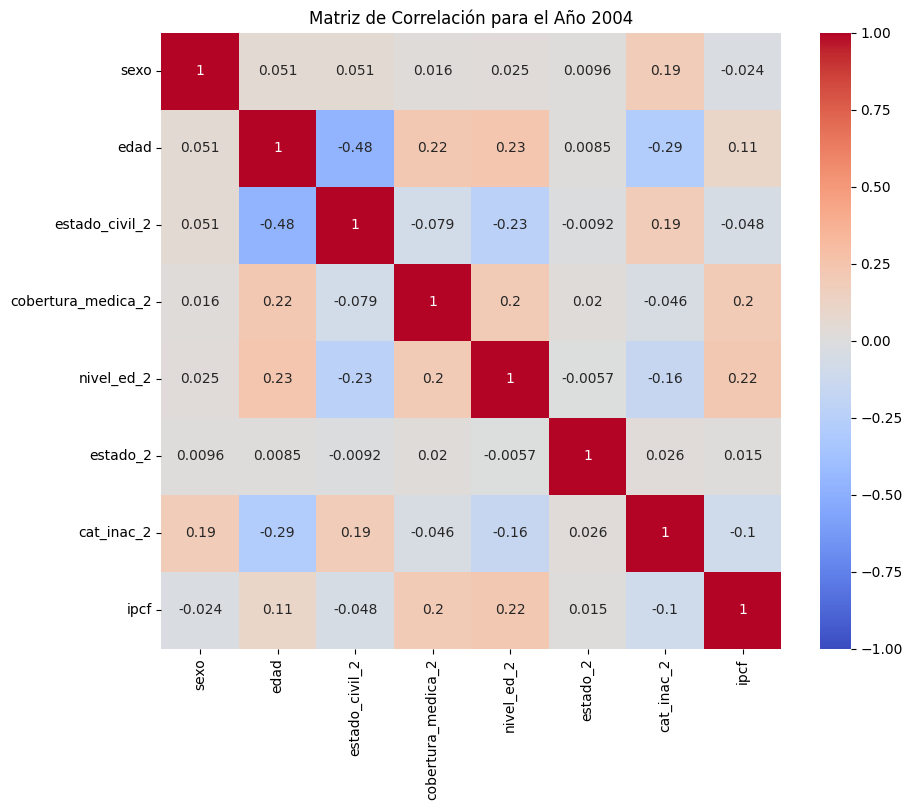

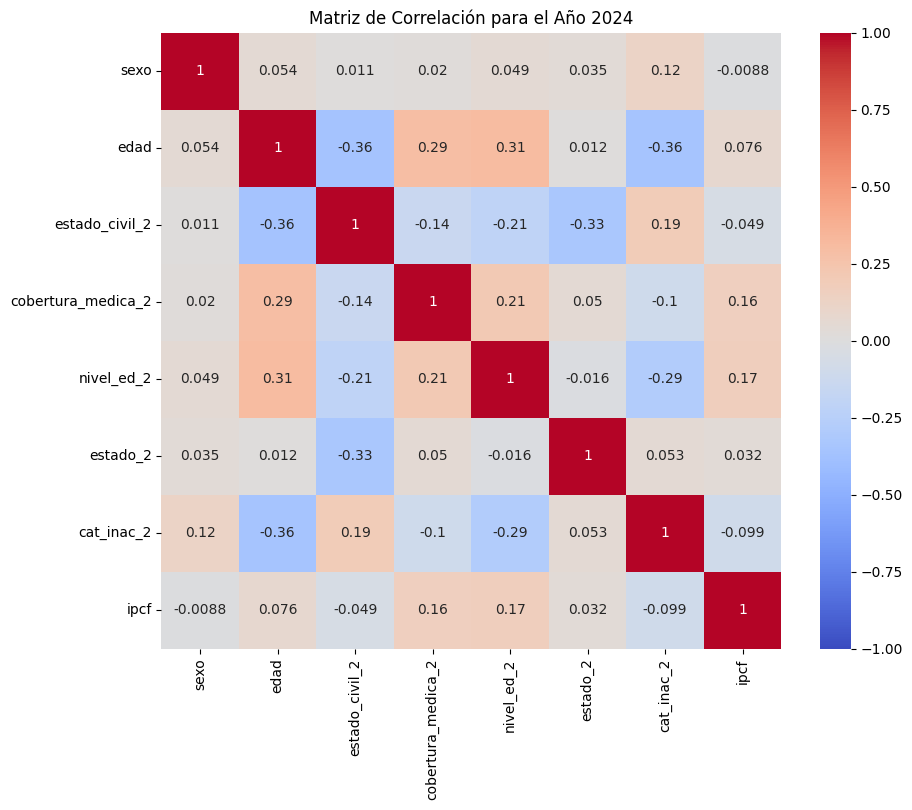

In [13]:

# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Seleccionar las columnas especificadas
variables = ['sexo', 'edad', 'estado_civil_2', 'cobertura_medica_2', 'nivel_ed_2', 'estado_2', 'cat_inac_2', 'ipcf']
# variables = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
df_2004_selected = df_2004.loc[:, variables]
df_2024_selected = df_2024.loc[:, variables]

# Calcular la matriz de correlación para cada año
correlation_2004 = df_2004_selected.corr()
correlation_2024 = df_2024_selected.corr()

# Crear un mapa de calor para la matriz de correlación de 2004
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2004, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para el Año 2004')
plt.show()

# Crear un mapa de calor para la matriz de correlación de 2024
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2024, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para el Año 2024')
plt.show()

e. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
¿Cuál es la media de ingreso per cápita familiar (IPCF) según
estado (ocupado, desocupado, inactivo)?

In [14]:
# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Calcular la media del IPCF para cada estado en 2004
mean_ipcf_2004 = df_2004[df_2004['estado'].isin([1, 2, 3])].groupby('estado')['ipcf'].mean()

# Calcular la media del IPCF para cada estado en 2024
mean_ipcf_2024 = df_2024[df_2024['estado'].isin([1, 2, 3])].groupby('estado')['ipcf'].mean()

# Crear un DataFrame con los resultados
mean_ipcf = pd.DataFrame({
    '2004': mean_ipcf_2004,
    '2024': mean_ipcf_2024
})

# Renombrar los índices para que sean 'Ocupado', 'Desocupado', 'Inactivo'
state_labels = {1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo'}
mean_ipcf.index = mean_ipcf.index.map(state_labels)

mean_ipcf


,2004,2024
estado,,
Ocupado,476.064755,207644.844045
Desocupado,224.231970,85019.145466
Inactivo,315.891856,130704.601499


In [15]:
# Contar la cantidad de "1", "2", y "3" en la columna "estado" del DataFrame "df_2004"
estado_counts_2004 = df_2004['estado'].value_counts().sort_index()
estado_counts_2024 = df_2024['estado'].value_counts().sort_index()
# Mostrar los resultados
print("Cantidad de cada estado en 2004:",estado_counts_2004)
print("Cantidad de cada estado en 2024:",estado_counts_2024)

Cantidad de cada estado en 2004: estado
0.0      10
1.0    3079
2.0     528
3.0    2800
4.0    1099
Name: count, dtype: int64
Cantidad de cada estado en 2024: estado
0.0      41
1.0    3224
2.0     311
3.0    2662
4.0     762
Name: count, dtype: int64


3. Uno de los grandes problemas de la EPH es la creciente cantidad de
hogares que no reportan sus ingresos (ver por ejemplo el siguiente
informe). ¿Cuántas personas no respondieron cuál es su condición de
actividad? Guarden como una base distinta llamada respondieron las
observaciones donde respondieron la pregunta sobre su condición de
actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una
base bajo el nombre norespondieron

In [16]:
# Filtrar las observaciones donde respondieron la pregunta sobre su condición de actividad
respondieron = df_unificado[df_unificado['estado'] != 0]

# Filtrar las observaciones donde no respondieron la pregunta sobre su condición de actividad
norespondieron = df_unificado[df_unificado['estado'] == 0]

# Mostrar la cantidad de personas que no respondieron su condición de actividad
print(f"Cantidad de personas que no respondieron su condición de actividad: {norespondieron.shape[0]}")

# Mostrar las primeras filas de las bases creadas
# respondieron.head()
# norespondieron.head()

Cantidad de personas que no respondieron su condición de actividad: 51


4. Agreguen a la base respondieron una columna llamada PEA
(Población Económicamente Activa) que tome 1 si están ocupados o
desocupados en ESTADO. Realicen un gráfico de barras mostrando la
composición por PEA para 2004 y 2024. Comenten los resultados.


C:\Users\s1290226\AppData\Local\Temp\ipykernel_25332\3534275769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


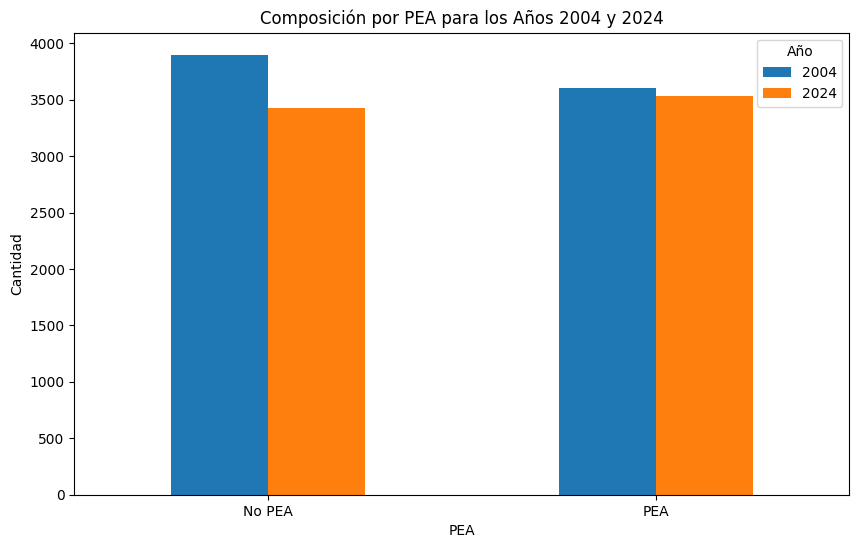

In [17]:
# Agregar la columna PEA (Población Económicamente Activa)
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Filtrar los datos para los años 2004 y 2024
pea_2004 = respondieron[respondieron['ano4'] == 2004.0]['PEA'].value_counts().sort_index()
pea_2024 = respondieron[respondieron['ano4'] == 2024.0]['PEA'].value_counts().sort_index()

# Crear un DataFrame con los conteos
pea_df = pd.DataFrame({
    '2004': pea_2004,
    '2024': pea_2024
}, index=[0, 1])

# Renombrar los índices para que sean 'No PEA' y 'PEA'
pea_df.index = ['No PEA', 'PEA']

# Crear el gráfico de barras
pea_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por PEA para los Años 2004 y 2024')
plt.xlabel('PEA')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

5. Agreguen a la base respondieron una columna llamada PET
(Población en Edad para Trabajar) que tome 1 si están la persona tiene
entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando
la composición por PEA para 2004 y 2024. Comenten los resultados y
compare PET con PEA

C:\Users\s1290226\AppData\Local\Temp\ipykernel_25332\1432567816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = respondieron['edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


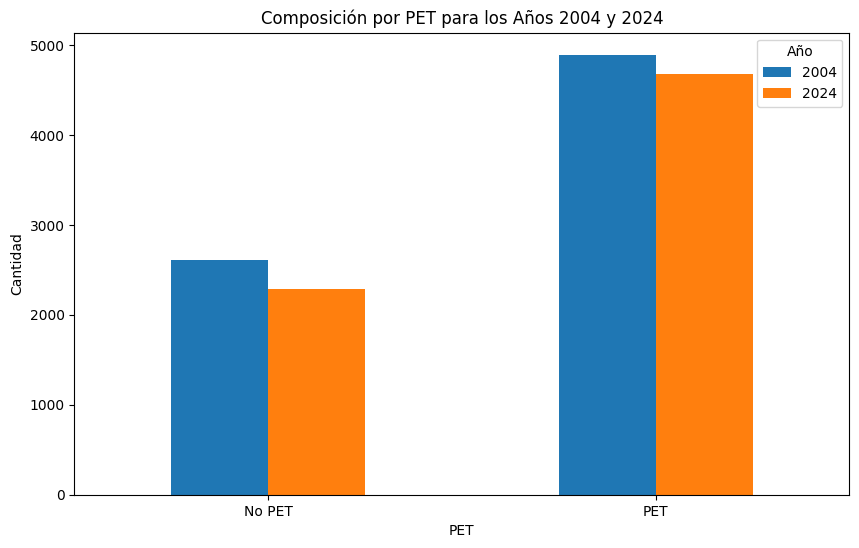

,PEA 2004,PEA 2024,PET 2004,PET 2024
0,3899,3424,2613,2284
1,3607,3535,4893,4675


In [18]:
# Agregar la columna PET (Población en Edad para Trabajar)
respondieron['PET'] = respondieron['edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Filtrar los datos para los años 2004 y 2024
pet_2004 = respondieron[respondieron['ano4'] == 2004.0]['PET'].value_counts().sort_index()
pet_2024 = respondieron[respondieron['ano4'] == 2024.0]['PET'].value_counts().sort_index()

# Crear un DataFrame con los conteos
pet_df = pd.DataFrame({
    '2004': pet_2004,
    '2024': pet_2024
}, index=[0, 1])

# Renombrar los índices para que sean 'No PET' y 'PET'
pet_df.index = ['No PET', 'PET']

# Crear el gráfico de barras
pet_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por PET para los Años 2004 y 2024')
plt.xlabel('PET')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

# Comparar PET con PEA
pea_pet_comparison = pd.DataFrame({
    'PEA 2004': pea_2004,
    'PEA 2024': pea_2024,
    'PET 2004': pet_2004,
    'PET 2024': pet_2024
})

pea_pet_comparison

6. Por ultimo, agreguen la base respondieron una columna llamada
desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [19]:
# Add the column "desocupado" to the dataframe "respondieron"
respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)

# Count the number of desocupied people in the year 2004
desocupado_2004 = respondieron[(respondieron['ano4'] == 2004.0) & (respondieron['desocupado'] == 1)].shape[0]

# Count the number of desocupied people in the year 2024
desocupado_2024 = respondieron[(respondieron['ano4'] == 2024.0) & (respondieron['desocupado'] == 1)].shape[0]

print(f"Múmero de personas desocupadas en 2004: {desocupado_2004}")
print(f"Número de personas desocupadas en 2024: {desocupado_2024}")

Múmero de personas desocupadas en 2004: 528
Número de personas desocupadas en 2024: 311


C:\Users\s1290226\AppData\Local\Temp\ipykernel_25332\3917740518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)


#### Parte II. Clasificación

In [20]:
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

1. Para cada año, partan la base "respondieron" en una base de prueba (test) y una de entrenamiento (train) utilizando el comando
train_test_split. La base de entrenamiento debe comprender el 70%
de los datos, y la semilla a utilizar (random state instance) debe ser 101.
Establezca a "desocupado" como su variable dependiente en la base de
entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1)

In [21]:
# Para realizar la predicción, vamos a crear un nuevo DataFrame con las variables que vamos a utilizar.
# "respondieron_2" va a contener las variables "ano4", "sexo", "edad", "estado_civil_2", "cobertura_medica_2", 
# "nivel_ed_2", "estado_2", "cat_inac_2", "ipcf", "PEA", "PET" y "desocupado".
respondieron_2 = respondieron[['ano4', 'sexo', 'edad', 'estado_civil_2', 'cobertura_medica_2', 'nivel_ed_2', 'estado_2', 'cat_inac_2', 'ipcf', 'PEA', 'PET', 'desocupado']]
# respondieron_2.head()

In [22]:
# Primero dividimos la base respondieron en dos bases, una para el año 2004 y otra para el año 2024.
resp_2004 = respondieron_2[respondieron_2['ano4'] == 2004.0]
resp_2024 = respondieron_2[respondieron_2['ano4'] == 2024.0]

In [23]:
# Entrenaremos con el 70% de la base de datos del 2004 y el resto se usarán para testear el modelo obtenido
train2004, test2004 = train_test_split(resp_2004, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_train_2004 = train2004['desocupado']
X_train_2004 = train2004.drop(columns=['desocupado', 'ano4'])

y_test_2004 = test2004['desocupado']
X_test_2004 = test2004.drop(columns=['desocupado', 'ano4'])

# Agregamos una columna de unos a X_train y X_test
X_train_2004 = X_train_2004.assign(intercept=1)
X_test_2004 = X_test_2004.assign(intercept=1)

# Repito lo mismo para el 2024
train2024, test2024 = train_test_split(resp_2024, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_test_2024 = test2024['desocupado']
X_test_2024 = test2024.drop(columns=['desocupado', 'ano4'])

y_train_2024 = train2024['desocupado']
X_train_2024 = train2024.drop(columns=['desocupado', 'ano4'])

# Agregamos una columna de unos a X_train y X_test
X_train_2024 = X_train_2024.assign(intercept=1)
X_test_2024 = X_test_2024.assign(intercept=1)

2. Implementen los siguientes métodos reportando luego la matriz de
confusión, la curva ROC, los valores de AUC y de Accuracy de cada uno:
- Regresión logística

In [24]:
# Ajustamos el clasificador con el metodo fit() para los datos del 2004
log_reg_2004 = LogisticRegression(penalty=None).fit(X_train_2004, y_train_2004)
# Y predecimos con los datos del test.
y_test_pred_score_log_2004 = log_reg_2004.predict_proba(X_test_2004)[:,1]
y_test_pred_log_2004 = log_reg_2004.predict(X_test_2004)

c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Primero calculamos la matriz de confusión para la regresión del año 2004.
tn_log_2004, fp_log_2004, fn_log_2004, tp_log_2004 = confusion_matrix(y_test_2004, y_test_pred_log_2004).ravel()   # Ravel transforma la matriz en un 1D array

print("Verdadero 0: ", tn_log_2004)
print("Falso 1: ", fp_log_2004)
print("Falso 0: ", fn_log_2004)
print("Verdadero 1: ", tp_log_2004)

Verdadero 0:  2085
Falso 1:  12
Falso 0:  140
Verdadero 1:  15


In [26]:
# Ahora calculamos AUC y ROC para la regresión logística del 2004.
auc_log_2004 = roc_auc_score(y_test_2004, y_test_pred_score_log_2004)
print('AUC: %.4f' % auc_log_2004)
fpr_log_2004, tpr_log_2004, thresholds_log_2004 = roc_curve(y_test_2004, y_test_pred_score_log_2004, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_log_2004)
print('FPR:', fpr_log_2004)
print('TPR:', tpr_log_2004)

AUC: 0.8779
Thresholds: [           inf 6.30453118e-01 6.07553373e-01 ... 5.85489246e-07
 7.42619604e-08 6.38143672e-08]
FPR: [0.00000000e+00 4.76871722e-04 9.53743443e-04 ... 9.99046257e-01
 9.99523128e-01 1.00000000e+00]
TPR: [0. 0. 0. ... 1. 1. 1.]


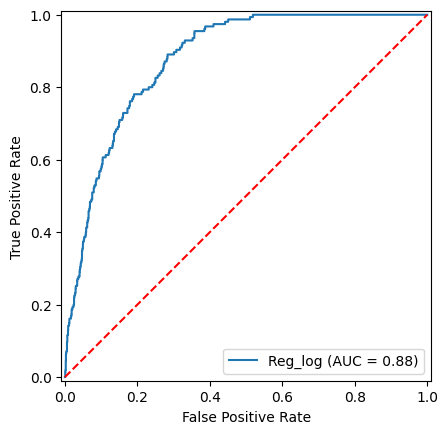

In [27]:
#Graficamos la curva ROC para la regresión logística del 2004.
display_log_2004 = RocCurveDisplay(fpr=fpr_log_2004, tpr=tpr_log_2004, roc_auc=auc_log_2004, estimator_name='Reg_log')
display_log_2004.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [28]:
# Por último, calculamos el accuracy del modelo de regresión logística del 2004.
accuracy_log_2004 = accuracy_score(y_test_2004, y_test_pred_log_2004)
print('Accuracy del modelo de regresión logística del 2004: %f' % accuracy_log_2004)

Accuracy del modelo de regresión logística del 2004: 0.932504


In [29]:
# Ahora repetimos el proceso para el 2024.
# Ajustamos el clasificador con el metodo fit() para los datos del 2024.
log_reg_2024 = LogisticRegression(penalty=None).fit(X_train_2024, y_train_2024)
# Y predecimos con los datos del test.
y_test_pred_score_log_2024 = log_reg_2024.predict_proba(X_test_2024)[:,1]
y_test_pred_log_2024 = log_reg_2024.predict(X_test_2024)

c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Primero calculamos la matriz de confusión para la regresión del año 2024.
tn_log_2024, fp_log_2024, fn_log_2024, tp_log_2024 = confusion_matrix(y_test_2024, y_test_pred_log_2024).ravel()   # Ravel transforma la matriz en un 1D array

print("Verdadero 0: ", tn_log_2024)
print("Falso 1: ", fp_log_2024)
print("Falso 0: ", fn_log_2024)
print("Verdadero 1: ", tp_log_2024)

Verdadero 0:  1988
Falso 1:  0
Falso 0:  100
Verdadero 1:  0


In [31]:
# Ahora calculamos AUC y ROC para la regresión logística del 2024.
auc_log_2024 = roc_auc_score(y_test_2024, y_test_pred_score_log_2024)
print('AUC: %.4f' % auc_log_2024)
fpr_log_2024, tpr_log_2024, thresholds_log_2024 = roc_curve(y_test_2024, y_test_pred_score_log_2024, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_log_2024)
print('FPR:', fpr_log_2024)
print('TPR:', tpr_log_2024)

AUC: 0.8141
Thresholds: [           inf 3.47078181e-01 3.06224762e-01 ... 5.80116029e-05
 5.17944296e-05 8.85144236e-08]
FPR: [0.         0.         0.         ... 0.99899396 0.99949698 1.        ]
TPR: [0.   0.01 0.02 ... 1.   1.   1.  ]


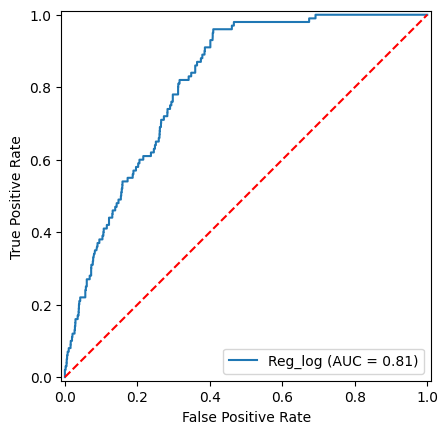

In [32]:
# Graficamos la curva ROC para la regresión logística del 2024.
display_log_2024 = RocCurveDisplay(fpr=fpr_log_2024, tpr=tpr_log_2024, roc_auc=auc_log_2024, estimator_name='Reg_log')
display_log_2024.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [33]:
# Por último, calculamos el accuracy del modelo de regresión logística del 2024.
accuracy_log_2024 = accuracy_score(y_test_2024, y_test_pred_log_2024)
print('Accuracy del modelo de regresión logística del 2024: %f' % accuracy_log_2024)

Accuracy del modelo de regresión logística del 2024: 0.952107


- Análisis discriminante lineal

In [34]:
# Ajustamos el LDA para los datos del 2004 usando la función LinearDiscriminantAnalysis() de sklearn.
lda_2004 = LinearDiscriminantAnalysis().fit(X_train_2004, y_train_2004)
# Y predecimos con los datos del test.
y_test_pred_score_lda_2004 = lda_2004.predict_proba(X_test_2004)[:,1]
y_test_pred_lda_2004 = lda_2004.predict(X_test_2004)

In [35]:
# En primer lugar, calculamos la matriz de confusión para el LDA del 2004.
confusion_matrix(y_test_2004, y_test_pred_lda_2004)

array([[2097,    0],
       [ 155,    0]], dtype=int64)

In [36]:
# Luego calculamos AUC y ROC para el LDA del 2004.
auc_lda_2004 = roc_auc_score(y_test_2004, y_test_pred_score_lda_2004)
print('AUC: %.4f' % auc_lda_2004)

fpr_lda_2004, tpr_lda_2004, thresholds_lda_2004 = roc_curve(y_test_2004, y_test_pred_score_lda_2004, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_lda_2004)
print('FPR:', fpr_lda_2004)
print('TPR:', tpr_lda_2004)

AUC: 0.8717
Thresholds: [       inf 0.38720648 0.38478781 ... 0.00197974 0.00188997 0.00184643]
FPR: [0.00000000e+00 4.76871722e-04 9.53743443e-04 ... 9.99046257e-01
 9.99523128e-01 1.00000000e+00]
TPR: [0. 0. 0. ... 1. 1. 1.]


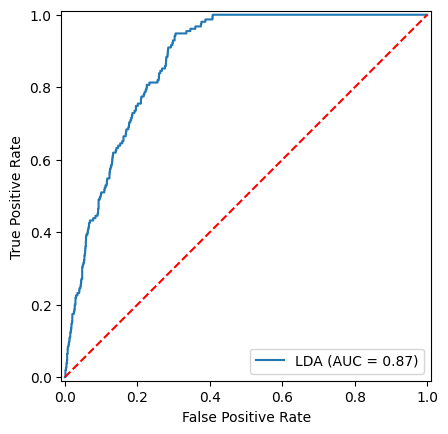

In [37]:
# Seguimos con la curva ROC para el LDA del 2004.
display_lda_2004 = RocCurveDisplay(fpr=fpr_lda_2004, tpr=tpr_lda_2004, roc_auc=auc_lda_2004, estimator_name='LDA')
display_lda_2004.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [38]:
# Por último, calculamos el accuracy del modelo LDA del 2004.
accuracy_lda_2004 = accuracy_score(y_test_2004, y_test_pred_lda_2004)
print('Accuracy del modelo LDA del 2004: %f' % accuracy_lda_2004)

Accuracy del modelo LDA del 2004: 0.931172


In [39]:
# Repetimos el proceso para el 2024.
# Ajustamos el LDA para los datos del 2024 usando la función LinearDiscriminantAnalysis() de sklearn.
lda_2024 = LinearDiscriminantAnalysis().fit(X_train_2024, y_train_2024)
# Y predecimos con los datos del test.
y_test_pred_score_lda_2024 = lda_2024.predict_proba(X_test_2024)[:,1]
y_test_pred_lda_2024 = lda_2024.predict(X_test_2024)

In [40]:
# En primer lugar, calculamos la matriz de confusión para el LDA del 2024.
confusion_matrix(y_test_2024, y_test_pred_lda_2024)

array([[1988,    0],
       [ 100,    0]], dtype=int64)

In [41]:
# Luego calculamos AUC y ROC para el LDA del 2024.
auc_lda_2024 = roc_auc_score(y_test_2024, y_test_pred_score_lda_2024)
print('AUC: %.4f' % auc_lda_2024)

fpr_lda_2024, tpr_lda_2024, thresholds_lda_2024 = roc_curve(y_test_2024, y_test_pred_score_lda_2024, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_lda_2024)
print('FPR:', fpr_lda_2024)
print('TPR:', tpr_lda_2024)

AUC: 0.8709
Thresholds: [           inf 3.16975203e-01 2.99308904e-01 ... 1.00889473e-03
 9.91768461e-04 1.89017210e-04]
FPR: [0.00000000e+00 5.03018109e-04 1.00603622e-03 ... 9.98993964e-01
 9.99496982e-01 1.00000000e+00]
TPR: [0. 0. 0. ... 1. 1. 1.]


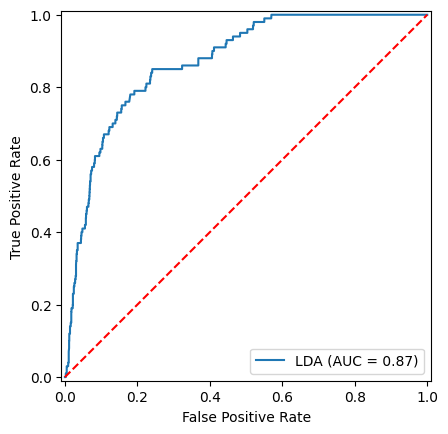

In [42]:
# Ahora graficamos la curva ROC para el LDA del 2024.
display_lda_2024 = RocCurveDisplay(fpr=fpr_lda_2024, tpr=tpr_lda_2024, roc_auc=auc_lda_2024, estimator_name='LDA')
display_lda_2024.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [43]:
# Por último, calculamos el accuracy del modelo LDA del 2024.
accuracy_lda_2024 = accuracy_score(y_test_2024, y_test_pred_lda_2024)
print('Accuracy del modelo LDA del 2024: %f' % accuracy_lda_2024)

Accuracy del modelo LDA del 2024: 0.952107


- KNN con k=3

In [44]:
# Entrenamos el modelo KNN para k = 3 con los datos del 2004.
knn_2004 = KNeighborsClassifier(n_neighbors=3).fit(X_train_2004, y_train_2004)
# Y predecimos con los datos del test.
y_test_pred_score_knn_2004 = knn_2004.predict_proba(X_test_2004)[:,1]
y_test_pred_knn_2004 = knn_2004.predict(X_test_2004)

In [45]:
# Primero calculamos la matriz de confusión para el KNN del 2004.
confusion_matrix(y_test_2004, y_test_pred_knn_2004)

array([[2055,   42],
       [ 137,   18]], dtype=int64)

In [46]:
# Luego calculamos AUC y ROC para el KNN del 2004.
auc_knn_2004 = roc_auc_score(y_test_2004, y_test_pred_score_knn_2004)
print('AUC: %.4f' % auc_knn_2004)

fpr_knn_2004, tpr_knn_2004, thresholds_knn_2004 = roc_curve(y_test_2004, y_test_pred_score_knn_2004, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_knn_2004)
print('FPR:', fpr_knn_2004)
print('TPR:', tpr_knn_2004)

AUC: 0.6304
Thresholds: [       inf 1.         0.66666667 0.33333333 0.        ]
FPR: [0.         0.00286123 0.02002861 0.14878398 1.        ]
TPR: [0.         0.03225806 0.11612903 0.4        1.        ]


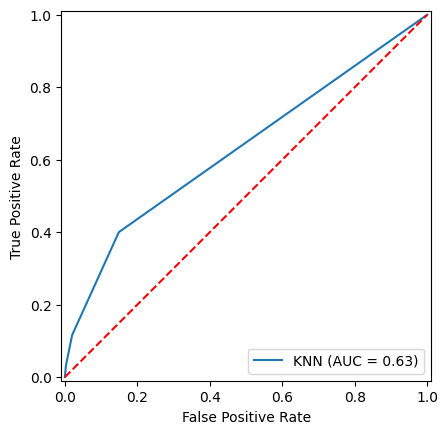

In [47]:
# Luego graficamos la curva ROC para el KNN del 2004.
display_knn_2004 = RocCurveDisplay(fpr=fpr_knn_2004, tpr=tpr_knn_2004, roc_auc=auc_knn_2004, estimator_name='KNN')
display_knn_2004.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [48]:
# Por último, calculamos el accuracy del modelo KNN del 2004.
accuracy_knn_2004 = accuracy_score(y_test_2004, y_test_pred_knn_2004)
print('Accuracy del modelo KNN del 2004: %f' % accuracy_knn_2004)

Accuracy del modelo KNN del 2004: 0.920515


In [49]:
# Ahora repetimos el proceso para el 2024.
# Entrenamos el modelo KNN para k = 3 con los datos del 2024.
knn_2024 = KNeighborsClassifier(n_neighbors=3).fit(X_train_2024, y_train_2024)
# Y predecimos con los datos del test.
y_test_pred_score_knn_2024 = knn_2024.predict_proba(X_test_2024)[:,1]
y_test_pred_knn_2024 = knn_2024.predict(X_test_2024)

In [50]:
# Primero calculamos la matriz de confusión para el KNN del 2024.
confusion_matrix(y_test_2024, y_test_pred_knn_2024)

array([[1969,   19],
       [  97,    3]], dtype=int64)

In [51]:
# Lugero calculamos AUC y ROC para el KNN del 2024.
auc_knn_2024 = roc_auc_score(y_test_2024, y_test_pred_score_knn_2024)
print('AUC: %.4f' % auc_knn_2024)

fpr_knn_2024, tpr_knn_2024, thresholds_knn_2024 = roc_curve(y_test_2024, y_test_pred_score_knn_2024, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_knn_2024)
print('FPR:', fpr_knn_2024)
print('TPR:', tpr_knn_2024)

AUC: 0.6003
Thresholds: [       inf 1.         0.66666667 0.33333333 0.        ]
FPR: [0.         0.00100604 0.00955734 0.09959759 1.        ]
TPR: [0.   0.01 0.03 0.3  1.  ]


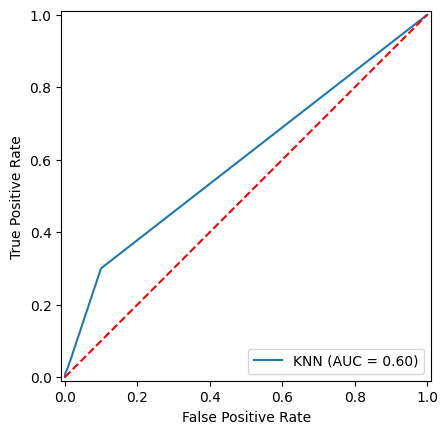

In [52]:
# Ahora graficamos la curva ROC para el KNN del 2024.
display_knn_2024 = RocCurveDisplay(fpr=fpr_knn_2024, tpr=tpr_knn_2024, roc_auc=auc_knn_2024, estimator_name='KNN')
display_knn_2024.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [53]:
# Por último, calculamos el accuracy del modelo KNN del 2024.
accuracy_knn_2024 = accuracy_score(y_test_2024, y_test_pred_knn_2024)
print('Accuracy del modelo KNN del 2024: %f' % accuracy_knn_2024)

Accuracy del modelo KNN del 2024: 0.944444


- Naive Bayes

In [54]:
# Queda un último modelo por probar, Naive Bayes.
# Entrenamos el modelo Naive Bayes con los datos del 2004.
nb_2004 = GaussianNB().fit(X_train_2004, y_train_2004)
# Y predecimos con los datos del test.
y_test_pred_score_nb_2004 = nb_2004.predict_proba(X_test_2004)[:,1]
y_test_pred_nb_2004 = nb_2004.predict(X_test_2004)

In [55]:
# Primero calculamos la matriz de confusión para el Naive Bayes del 2004.
conf_mat_nb_2004 = confusion_matrix(y_test_2004, y_test_pred_nb_2004)
print(conf_mat_nb_2004)

[[1298  799]
 [  13  142]]


In [56]:
# Luego calculamos AUC y ROC para el Naive Bayes del 2004.
auc_nb_2004 = roc_auc_score(y_test_2004, y_test_pred_score_nb_2004)
print('AUC: %.4f' % auc_nb_2004)

fpr_nb_2004, tpr_nb_2004, thresholds_nb_2004 = roc_curve(y_test_2004, y_test_pred_score_nb_2004, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_nb_2004)
print('FPR:', fpr_nb_2004)
print('TPR:', tpr_nb_2004)

AUC: 0.8484
Thresholds: [            inf 9.99745091e-001 9.99741548e-001 ... 2.07813892e-318
 2.15906687e-321 0.00000000e+000]
FPR: [0.00000000e+00 4.76871722e-04 9.53743443e-04 ... 6.36146876e-01
 6.36623748e-01 1.00000000e+00]
TPR: [0. 0. 0. ... 1. 1. 1.]


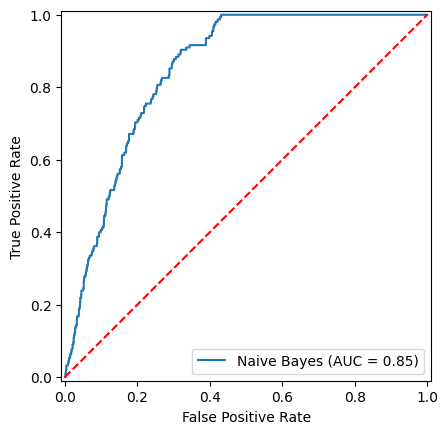

In [57]:
# Luego, graficamos la curva ROC para el Naive Bayes del 2004.
display_nb_2004 = RocCurveDisplay(fpr=fpr_nb_2004, tpr=tpr_nb_2004, roc_auc=auc_nb_2004, estimator_name='Naive Bayes')
display_nb_2004.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [58]:
# Por último, calculamos el accuracy del modelo Naive Bayes del 2004.
accuracy_nb_2004 = accuracy_score(y_test_2004, y_test_pred_nb_2004)
print('Accuracy del modelo Naive Bayes del 2004: %f' % accuracy_nb_2004)

Accuracy del modelo Naive Bayes del 2004: 0.639432


In [59]:
# Ahora repetimos el proceso para el 2024.
# Entrenamos el modelo Naive Bayes con los datos del 2024.
nb_2024 = GaussianNB().fit(X_train_2024, y_train_2024)
# Y predecimos con los datos del test.
y_test_pred_score_nb_2024 = nb_2024.predict_proba(X_test_2024)[:,1]
y_test_pred_nb_2024 = nb_2024.predict(X_test_2024)

In [60]:
# Primero calculamos la matriz de confusión para el Naive Bayes del 2024.
conf_mat_nb_2024 = confusion_matrix(y_test_2024, y_test_pred_nb_2024)
print(conf_mat_nb_2024)

[[1988    0]
 [ 100    0]]


In [61]:
# Luego calculamos AUC y ROC para el Naive Bayes del 2024.
auc_nb_2024 = roc_auc_score(y_test_2024, y_test_pred_score_nb_2024)
print('AUC: %.4f' % auc_nb_2024)

fpr_nb_2024, tpr_nb_2024, thresholds_nb_2024 = roc_curve(y_test_2024, y_test_pred_score_nb_2024, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_nb_2024)
print('FPR:', fpr_nb_2024)
print('TPR:', tpr_nb_2024)

AUC: 0.7185
Thresholds: [            inf 1.85054540e-001 1.84829060e-001 ... 2.00838204e-103
 1.65210288e-123 0.00000000e+000]
FPR: [0.00000000e+00 5.03018109e-04 1.00603622e-03 ... 9.98993964e-01
 9.99496982e-01 1.00000000e+00]
TPR: [0. 0. 0. ... 1. 1. 1.]


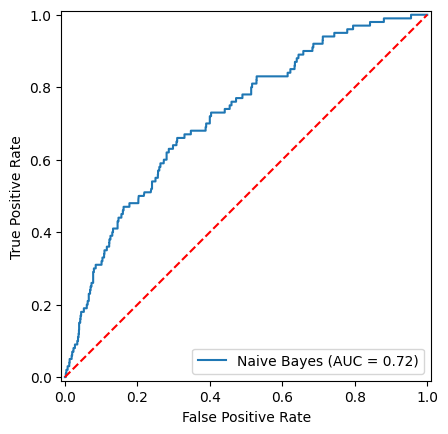

In [62]:
# Ahora graficamos la curva ROC para el Naive Bayes del 2024.
display_nb_2024 = RocCurveDisplay(fpr=fpr_nb_2024, tpr=tpr_nb_2024, roc_auc=auc_nb_2024, estimator_name='Naive Bayes')
display_nb_2024.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [63]:
# Por último, calculamos el accuracy del modelo Naive Bayes del 2024.
accuracy_nb_2024 = accuracy_score(y_test_2024, y_test_pred_nb_2024)
print('Accuracy del modelo Naive Bayes del 2024: %f' % accuracy_nb_2024)

Accuracy del modelo Naive Bayes del 2024: 0.952107


3. Compare los resultados de 2004 versus 2024. ¿Cuál de los métodos predice mejor en cada año? Justifiquen detalladamente utilizando las medidas de precisión que conocen.

In [64]:
from pandas.plotting import table

# Ahora vamos a comparar los modelos de regresión logística, LDA, KNN y Naive Bayes para el año 2004.
# Creamos un DataFrame con los resultados.
results_2004 = pd.DataFrame({
    'Regresión Logística': [accuracy_log_2004, auc_log_2004],
    'LDA': [accuracy_lda_2004, auc_lda_2004],
    'KNN': [accuracy_knn_2004, auc_knn_2004],
    'Naive Bayes': [accuracy_nb_2004, auc_nb_2004]
}, index=['Accuracy', 'AUC'])

results_2004

,Regresión Logística,LDA,KNN,Naive Bayes
Accuracy,0.932504,0.931172,0.920515,0.639432
AUC,0.877856,0.871718,0.630398,0.848376


C:\Users\s1290226\AppData\Local\Temp\ipykernel_25332\3153817645.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_2004 = results_2004.applymap(lambda x: f'{float(x):.4f}')


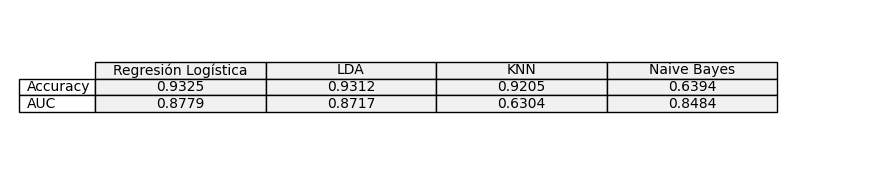

In [65]:
# Format the numbers in the DataFrame to show only four digits after the comma
results_2004 = results_2004.applymap(lambda x: f'{float(x):.4f}')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(11, 2))  # Adjust the size as needed

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
tbl = table(ax, results_2004, loc='center', cellLoc='center', colWidths=[0.2]*len(results_2004.columns), cellColours=[['#f1f1f2']*len(results_2004.columns)]*len(results_2004), colColours=['#f1f1f2']*len(results_2004.columns))

# Adjust the font size
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)

# Save the table as an image
plt.savefig("results_2004.png", bbox_inches='tight', pad_inches=0.1)

# Show the plot (optional)
plt.show()

In [66]:
# Ahora vamos a comparar los modelos de regresión logística, LDA, KNN y Naive Bayes para el año 2024.
# Creamos un DataFrame con los resultados.
results_2024 = pd.DataFrame({
    'Regresión Logística': [accuracy_log_2024, auc_log_2024],
    'LDA': [accuracy_lda_2024, auc_lda_2024],
    'KNN': [accuracy_knn_2024, auc_knn_2024],
    'Naive Bayes': [accuracy_nb_2024, auc_nb_2024]
}, index=['Accuracy', 'AUC'])

results_2024

,Regresión Logística,LDA,KNN,Naive Bayes
Accuracy,0.952107,0.952107,0.944444,0.952107
AUC,0.814079,0.870936,0.600294,0.718461


C:\Users\s1290226\AppData\Local\Temp\ipykernel_25332\506910979.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_2024 = results_2024.applymap(lambda x: f'{float(x):.4f}')


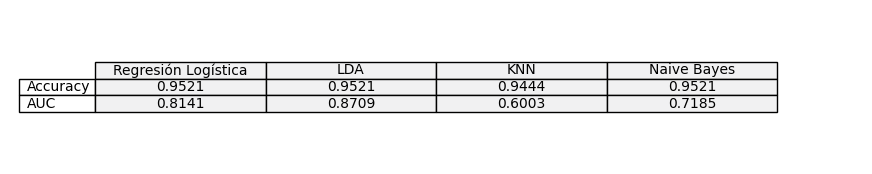

In [67]:
# Format the numbers in the DataFrame to show only four digits after the comma
results_2024 = results_2024.applymap(lambda x: f'{float(x):.4f}')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(11, 2))  # Adjust the size as needed

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
tbl = table(ax, results_2024, loc='center', cellLoc='center', colWidths=[0.2]*len(results_2024.columns), cellColours=[['#f1f1f2']*len(results_2024.columns)]*len(results_2024), colColours=['#f1f1f2']*len(results_2024.columns))

# Adjust the font size
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)

# Save the table as an image
plt.savefig("results_2024.png", bbox_inches='tight', pad_inches=0.1)

# Show the plot (optional)
plt.show()

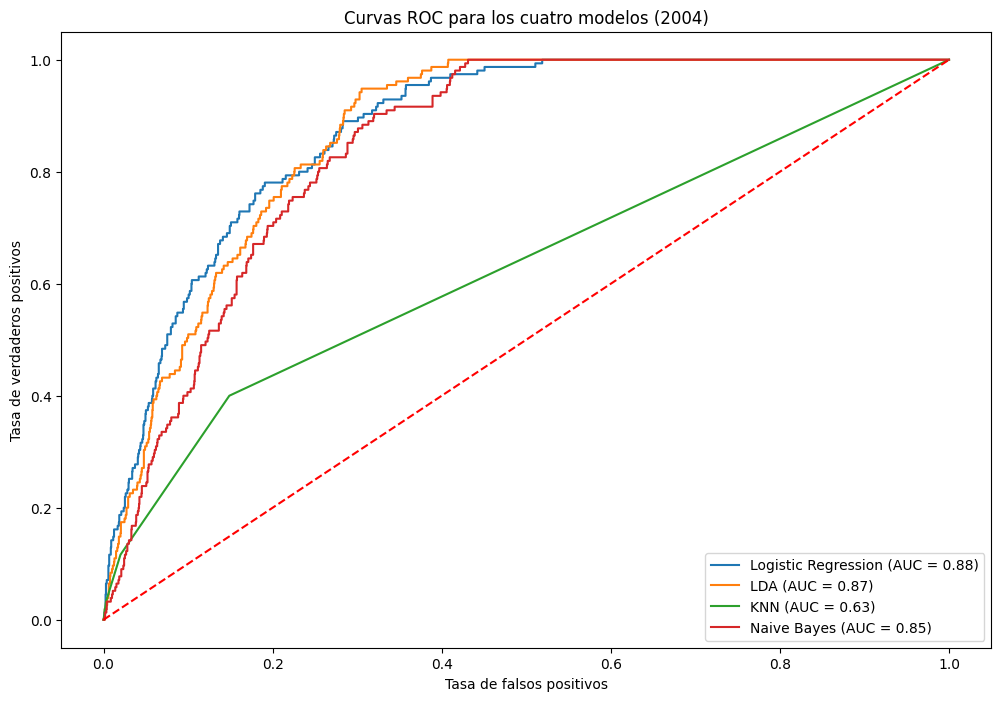

In [68]:
# Ahora vamos a graficar la curva ROC de los cuatro modelos para 2004 en un solo gráfico para mejorar la visualización.
plt.figure(figsize=(12, 8))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_log_2004, tpr_log_2004, label=f'Logistic Regression (AUC = {auc_log_2004:.2f})')

# Plot ROC curve for LDA
plt.plot(fpr_lda_2004, tpr_lda_2004, label=f'LDA (AUC = {auc_lda_2004:.2f})')

# Plot ROC curve for KNN
plt.plot(fpr_knn_2004, tpr_knn_2004, label=f'KNN (AUC = {auc_knn_2004:.2f})')

# Plot ROC curve for Naive Bayes
plt.plot(fpr_nb_2004, tpr_nb_2004, label=f'Naive Bayes (AUC = {auc_nb_2004:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas ROC para los cuatro modelos (2004)')
plt.legend()
plt.show()

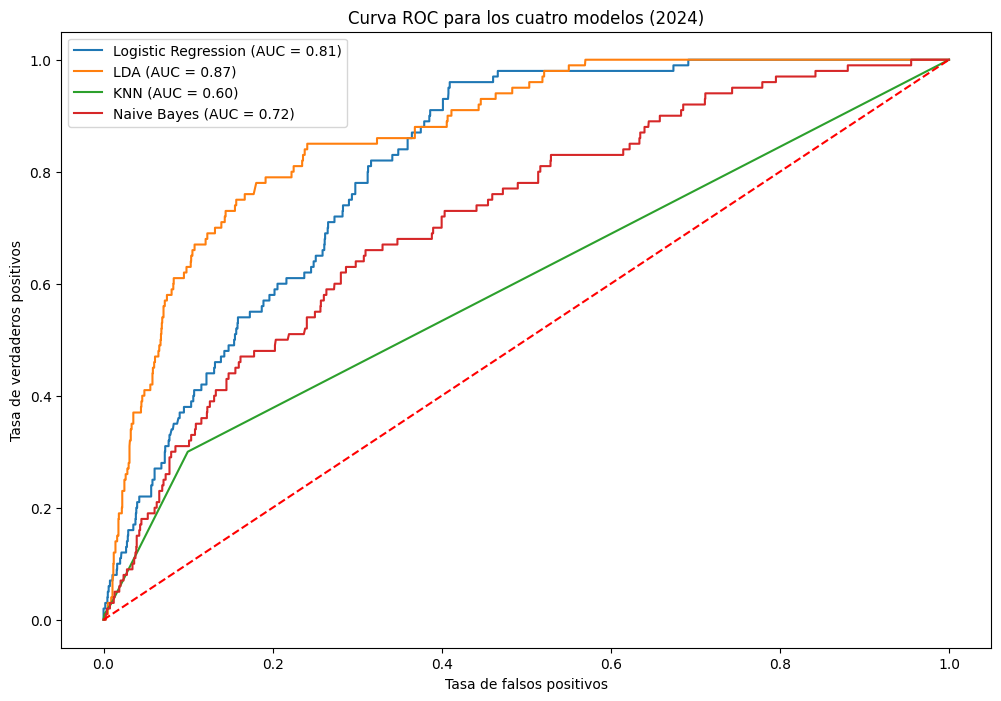

In [69]:
# Ahora vamos a graficar la curva ROC de los cuatro modelos para 2024 en un solo gráfico para mejorar la visualización.
plt.figure(figsize=(12, 8))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_log_2024, tpr_log_2024, label=f'Logistic Regression (AUC = {auc_log_2024:.2f})')

# Plot ROC curve for LDA
plt.plot(fpr_lda_2024, tpr_lda_2024, label=f'LDA (AUC = {auc_lda_2024:.2f})')

# Plot ROC curve for KNN
plt.plot(fpr_knn_2024, tpr_knn_2024, label=f'KNN (AUC = {auc_knn_2024:.2f})')

# Plot ROC curve for Naive Bayes
plt.plot(fpr_nb_2024, tpr_nb_2024, label=f'Naive Bayes (AUC = {auc_nb_2024:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para los cuatro modelos (2024)')
plt.legend()
plt.show()

Based on the results provided, the best model to predict the variable "desocupados" for the year 2004 is the Logistic Regression model. This conclusion is drawn from the following metrics:

- **Accuracy**: The Logistic Regression model has an accuracy of 0.9325, which is the highest among all the models.
- **AUC (Area Under the ROC Curve)**: The Logistic Regression model has an AUC of 0.8779, which is also the highest among all the models.

These metrics indicate that the Logistic Regression model performs better in terms of both accuracy and the ability to distinguish between classes (desocupados and no desocupados) compared to the other models (LDA, KNN, and Naive Bayes).

Based on the results provided, the best model to predict the variable "desocupados" for the year 2024 is the Linear Discriminant Analysis (LDA) model. This conclusion is drawn from the following metrics:

- **Accuracy**: The LDA model has an accuracy of 0.9521, which is the highest among all the models.
- **AUC (Area Under the ROC Curve)**: The LDA model has an AUC of 0.8709, which is the highest among all the models.

These metrics indicate that the LDA model performs better in terms of both accuracy and the ability to distinguish between classes (desocupados and no desocupados) compared to the other models (Logistic Regression, KNN, and Naive Bayes).

4. Con el método que seleccionaron, predigan qué personas son desocupadas dentro de la base norespondieron. ¿Qué proporción de las personas que no respondieron pudieron identificar como desocupadas?

In [70]:
# Es útil saber cuántas personas no respondieron a la encuesta para luego darse cuenta si los resultados tienen sentido o no.
num_rows = norespondieron.shape[0]
print(f"The number of rows in the norespondieron DataFrame is: {num_rows}")

The number of rows in the norespondieron DataFrame is: 51


In [71]:
# Primero vamos a agregar la columan PET (Población en Edad de Trabajar) a la base de datos "norespondieron".
norespondieron['PET'] = norespondieron['edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Para realizar la predicción, vamos a crear un nuevo DataFrame con las variables que vamos a utilizar.
# "norespondieron_2" va a contener las variables "ano4", "sexo", "edad", "estado_civil_2", "cobertura_medica_2", 
# "nivel_ed_2", "estado_2", "cat_inac_2", "ipcf" y "PET".
norespondieron_2 = norespondieron[['ano4', 'sexo', 'edad', 'estado_civil_2', 'cobertura_medica_2', 'nivel_ed_2', 'estado_2', 'cat_inac_2', 'ipcf', 'PET']]

# De nuestra base de datos "respondieron", sabemos que el mejor modelo para predecir los desocupados en el año 2004 es la regresión logística
# y que el mejor modelo para predecir los desocupados en el año 2024 es el LDA. Por lo tanto, vamos a dividir la base "norespondieron" en dos bases,
# una para el año 2004 y otra para el año 2024.
noresp_2004 = norespondieron_2[norespondieron_2['ano4'] == 2004.0]
noresp_2024 = norespondieron_2[norespondieron_2['ano4'] == 2024.0]

C:\Users\s1290226\AppData\Local\Temp\ipykernel_25332\4294551082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron['PET'] = norespondieron['edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


In [72]:
# Primero, predecimos los valores de desocupados para el año 2004.
# Definimos las variables dependientes e independientes para el año 2004.
X_noresp_2004 = noresp_2004.drop(columns=['ano4'])
X_noresp_2004 = X_noresp_2004.assign(intercept=1)

# Aseguramos que las columnas coincidan con las usadas durante el entrenamiento
X_noresp_2004 = X_noresp_2004.reindex(columns=X_train_2004.columns, fill_value=0)

# Ajustamos el modelo de regresión logística para el año 2004.
y_noresp_pred_log_2004 = log_reg_2004.predict(X_noresp_2004)

In [73]:
#Ahora predecimos los valores de desocupados para el año 2024.
# Definimos las variables dependientes e independientes para el año 2024.
X_noresp_2024 = noresp_2024.drop(columns=['ano4'])
X_noresp_2024 = X_noresp_2024.assign(intercept=1)

# Aseguramos que las columnas coincidan con las usadas durante el entrenamiento
X_noresp_2024 = X_noresp_2024.reindex(columns=X_train_2024.columns, fill_value=0)

# Predecimos con el modelo LDA del 2024.
y_noresp_pred_2024 = lda_2024.predict(X_noresp_2024)

In [74]:
# Ahora vamos a agregar las predicciones a la base de datos "norespondieron".
noresp_2004['desocupado_pred'] = y_noresp_pred_log_2004
noresp_2024['desocupado_pred'] = y_noresp_pred_2024

# Y vamos a unir nuevamente las bases de datos "noresp_2004" y "noresp_2024" a la base de datos "norespondieron_pred".
norespondieron_pred = pd.concat([noresp_2004, noresp_2024])

# Identificamos la cantidad de personas desocupadas predichas que no respondieron su estado.
desocupados_pred = norespondieron_pred['desocupado_pred'].sum()

print(f"Número de desocupados predichas: {desocupados_pred}")

# Ahora vamos a calcular el porcentaje de desocupados predichos para el año 2004.
desocupados_pred_pct = desocupados_pred / norespondieron_2.shape[0] * 100

print(f"Porcentaje de desocupados predichos es {desocupados_pred_pct:.2f}%")

Número de desocupados predichas: 13
Porcentaje de desocupados predichos es 25.49%


C:\Users\s1290226\AppData\Local\Temp\ipykernel_25332\317004453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noresp_2004['desocupado_pred'] = y_noresp_pred_log_2004
C:\Users\s1290226\AppData\Local\Temp\ipykernel_25332\317004453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noresp_2024['desocupado_pred'] = y_noresp_pred_2024
